In [7]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import env
from env import get_db_url

In [ ]:
#Answer with the type of test you would use (assume normal distribution):

#Is there a difference in grades of students on the second floor 
#compared to grades of all students?
#one sample compared to population
#two tail nondirectional difference

#answer: one sample t test stats.ttest_1samp(scnd_fl_grade_mean,α) p/2 < α
#two tails one sample ttest

In [2]:
#Are adults who drink milk taller than adults who dont drink milk?
#two samples
# one tail is directional

#answer: two sample independent ttest p < α
#stats.ttest_ind(milkdrinkers_height,nonmilkdrinkers_height,equal_var=True)

In [3]:
#Is the the price of gas higher in texas or in new mexico?
#two samples, one tail

#answer: two sample t test, equal_var = p_val of levene (texasgp,nmgp)<α
#stats.ttest_ind(texasgp,nmgp,equal_var=(levene p_val of (texasgp,nmgp)<α))

In [ ]:
#Are there differences in stress levels between students who take data science 
#vs students who take web development vs students who take cloud academy?
#3 samples 2 tail, no directionallity

#answer:ANOVA stats.f_oneway(dsst,wdst,cast)

In [88]:
#Ace Realty wants to determine whether the average time it takes to sell homes is 
#different for its two offices. 
#A sample of 40 sales from office #1 revealed a mean of 90 days and a 
#standard deviation of 15 days. A sample of 50 sales from office 
#2 revealed a mean of 100 days and a standard deviation of 20 days. 
#Use a .05 level of significance.

## two samples: office 1 and office 2 #two tail:is there a difference?

#two sample t test 2 tail

office1_dist = stats.norm(90,15).rvs(40)
office2_dist = stats.norm(100,20).rvs(50)

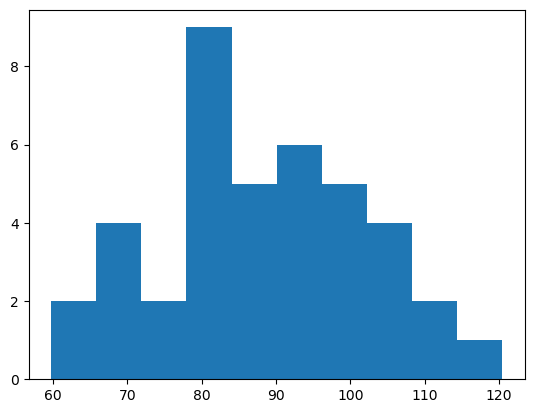

In [30]:
plt.hist(office1_dist)
plt.show()

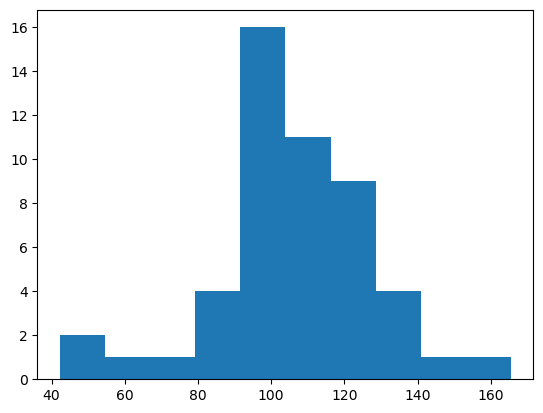

In [31]:
plt.hist(office2_dist)
plt.show()

In [94]:
office_1_mean = 90
office_1_std = 15
office_2_mean = 100
office_2_std = 20

In [109]:
t_stat, p_val = stats.ttest_ind_from_stats(mean1=office_1_mean,
                           std1=office_1_std, 
                           nobs1=40,
                          mean2=office_2_mean,
                          std2=office_2_std,
                          nobs2=50,
                          equal_var=True)

In [110]:
α = 0.05

In [113]:
#two tailed test means divide by 2
if p_val < α:
    print('we can reject the null hypothesis, and suggest that there is difference in mean sale time between offices')
else:
    print('we cannot reject the null hypothesis')

we can reject the null hypothesis, and suggest that there is difference in mean sale time between offices


In [101]:
#levene test:
#H0= there is equal varience between the two offices
#Ha= there is inequal variance between the two office

In [102]:
stats.levene(office1_dist,office2_dist)

LeveneResult(statistic=7.949346230559512, pvalue=0.005942193032647159)

In [103]:
t_stat,p_val = stats.ttest_ind(office1_dist,office2_dist,equal_var = False)

In [104]:
p_val

6.588381960497214e-05

In [105]:
p_val < 0.05

True

In [ ]:
## answer: there is a measurable difference

In [63]:
#Load the mpg dataset and use it to answer the following questions:
mpg = data('mpg')


In [69]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufacturer     234 non-null    object 
 1   model            234 non-null    object 
 2   displ            234 non-null    float64
 3   year             234 non-null    int64  
 4   cyl              234 non-null    int64  
 5   trans            234 non-null    object 
 6   drv              234 non-null    object 
 7   cty              234 non-null    int64  
 8   hwy              234 non-null    int64  
 9   fl               234 non-null    object 
 10  class            234 non-null    object 
 11  fuel_efficiency  234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [63]:
mpg['fuel_efficiency'] = (mpg['cty'] + mpg['hwy']) /2

In [114]:
mpg['fe'] = stats.hmean((mpg['hwy'], mpg['cty']))

In [64]:
mpg.fuel_efficiency.nunique()

40

In [65]:
#Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
#two sample one tail
fe2008 = mpg[mpg.year != 1999].fuel_efficiency
fe1999 = mpg[mpg.year == 1999].fuel_efficiency
stats.levene(fe2008,fe1999)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

H$_0$:#there is no difference

H$_a$: there is a difference in fuel efficiency

(array([ 7.,  5., 32.,  4., 19., 22., 15.,  8.,  2.,  3.]),
 array([10.5, 12.7, 14.9, 17.1, 19.3, 21.5, 23.7, 25.9, 28.1, 30.3, 32.5]),
 <BarContainer object of 10 artists>)

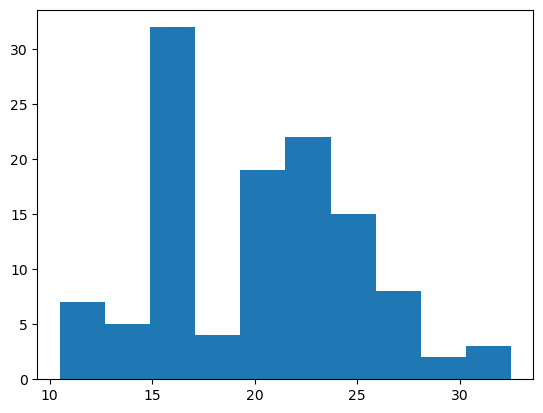

In [115]:
plt.hist(fe2008)

(array([32., 13., 12., 38., 12.,  5.,  2.,  0.,  1.,  2.]),
 array([13.  , 15.65, 18.3 , 20.95, 23.6 , 26.25, 28.9 , 31.55, 34.2 ,
        36.85, 39.5 ]),
 <BarContainer object of 10 artists>)

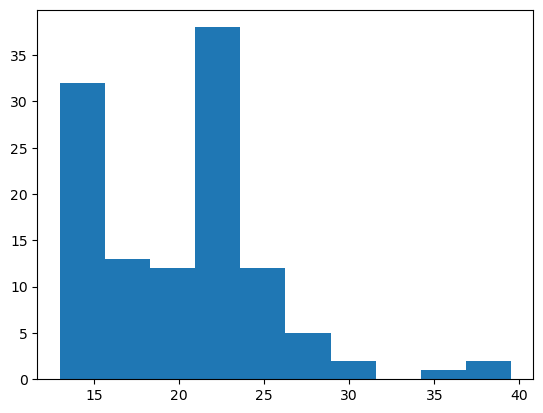

In [116]:
plt.hist(fe1999)

In [121]:
#pvalue over 0.05 cannot reject null equal_var=True
stats.levene(fe2008,fe1999)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [118]:
#1999 and 2008 are exclusive categories so ttest ind

In [122]:
t_stat,p_val = stats.ttest_ind(fe2008,fe1999,equal_var=True)

In [123]:
p_val < α

False

In [124]:
#we fail to reject the null hypothesis, which means
#that we cannot with certainty say there is a difference
#there is no difference in fuel-efficiency

Are compact cars more fuel-efficient than the average car?

H$_0$:compact cars have lower or equal average fuel efficiency compared to all cars

H$_a$: compact cars have a greater than average fuel efficiency compared to all cars

In [125]:
#Are compact cars more fuel-efficient than the average car?
#1sample one tail ttest
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [71]:
compacts = mpg[mpg['class'] == 'compact']

In [75]:
t_stat,p_val= stats.ttest_1samp(compacts.fuel_efficiency,mpg.fuel_efficiency.mean())

In [126]:
p_val

0.8263744040323578

In [128]:
if ((p_val /2) < α) and (t_stat > 0):
    print('we can reject the null hypothesis')
    print('there is evidence that the alternative posited is valid')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [ ]:
## compact cars are more effecient than other cars

In [ ]:
#Do manual cars get better gas mileage than automatic cars?
#2 samples one tail

In [81]:
mpg['auto_transmission'] = mpg.trans.str.startswith('auto')
#use mask to get auto.hwy
auto_fe= mpg[mpg['auto_transmission']== True].fuel_efficiency
#us mask to get manual trans.hwy
manual_fe= mpg[mpg['auto_transmission']!= True].fuel_efficiency

In [ ]:
#group a manual cars
#group b auto cars
#independent sub-groups:
#ttest_ind

In [ ]:
#levene test
#h0: equal var
#ha: inequal var

In [130]:
__, levene_p = stats.levene(auto_fe,manual_fe)

In [131]:
levene_p < 0.05

False

In [135]:
#we cannot reject null, equal_var= True
t_stat,p_val = stats.ttest_ind(manual_fe,auto_fe,equal_var=True)

In [136]:
p_val < 0.05

True

In [137]:
#p_val is less than alpha
#tstat?

In [138]:
t_stat

4.593437735750014

In [87]:
#manual cars get better gas mileage than automatics

In [ ]:
##Answer with the type of stats test you would use 
##(assume normal distribution):

#Do students get better test grades if they have a rubber duck on their desk?
### Ttest
#Does smoking affect when or not someone has lung cancer?
### chi2
#Is gender independent of a person’s blood type?
### chi2
#A farming company wants to know if a new fertilizer has improved crop yield or not
### ttest
#Does the length of time of the lecture correlate with a students grade?
### pearsonsr
#Do people with dogs live in apartments more than people with cats?
### chi2
#Is there a relationship between the length of your 
#arm and the length of your foot?
### pearsonr
#Do guys and gals quit their jobs at the same rate?
#chi2

Use the telco_churn data. Does tenure correlate with monthly charges?

In [24]:
telco = pd.read_csv('/Users/gabrielcavazos/Downloads/telco_churn.csv')

In [25]:
telco.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


H$_0$: There is no linear realationship between tenure and monthly charges

H$_a$: There is a linear relationship between tenure and monthly charges

In [26]:
# Set an alpha for a 95% confidence level
α = 0.05

In [27]:
r, p = stats.pearsonr(telco.tenure, telco.MonthlyCharges)

In [28]:
if p < α:
    print('We can reject the null hypothesis!')

We can reject the null hypothesis!


total charges?

In [29]:
# looks like total charges isnt a number yet.  Let's fix that!
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
telco.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [31]:
telco.TotalCharges = (
    telco.TotalCharges + 
    '0').astype(float)

H$_0$: There is no linear realationship between tenure and total charges

H$_a$: There is a linear relationship between tenure and total charges

In [32]:
r, p = stats.pearsonr(telco.TotalCharges,
                     telco.tenure)
if p < α:
    print('We can reject the null hypothesis')

We can reject the null hypothesis


What happens if you control for phone and internet service?

In [33]:
internets = telco.InternetService.unique()

In [34]:
phones = telco.PhoneService.unique()

In [35]:
import itertools

In [36]:
combos = list(itertools.product(internets,phones))

In [37]:
# lets create a for loop for each of these combinations
telco[(telco['InternetService'] == 'DSL'
      )& (telco['PhoneService'] == 'No')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50,No
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No


In [38]:
for combo in combos:
    subset = telco[(telco['InternetService'] == combo[0]
      )& (telco['PhoneService'] == combo[1])]
    print(combo)
    print(subset.shape)
    if (combo == ('Fiber optic', 'No')) or (combo == ('No', 'No')):
        pass
    else:
        r, p = stats.pearsonr(subset.tenure, 
                             subset.TotalCharges)
        if p < α:
            print(f'''
            we can reject the null hypothesis that
            there is no linear relationship between Internet
            Service Type {combo[0]} and Phone Service Type
            {combo[1]}''')

('DSL', 'No')
(682, 21)

            we can reject the null hypothesis that
            there is no linear relationship between Internet
            Service Type DSL and Phone Service Type
            No
('DSL', 'Yes')
(1739, 21)

            we can reject the null hypothesis that
            there is no linear relationship between Internet
            Service Type DSL and Phone Service Type
            Yes
('Fiber optic', 'No')
(0, 21)
('Fiber optic', 'Yes')
(3096, 21)

            we can reject the null hypothesis that
            there is no linear relationship between Internet
            Service Type Fiber optic and Phone Service Type
            Yes
('No', 'No')
(0, 21)
('No', 'Yes')
(1526, 21)

            we can reject the null hypothesis that
            there is no linear relationship between Internet
            Service Type No and Phone Service Type
            Yes


Use the employees database.
Is there a relationship between how long an employee has been with the company and their salary?

In [39]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [40]:
query = '''
SELECT
    DATEDIFF((SELECT MAX(hire_date) 
    FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''
employees_with_salaries = pd.read_sql(query, url)

In [41]:
employees_with_salaries.head()

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692


H$_0$: There is no linear relationship between tenure and salary

H$_a$: There is a linear relattionship between tenure and salary

In [42]:
r, p = stats.pearsonr(
    employees_with_salaries['tenure'],
employees_with_salaries['salary'])

In [43]:
p < α

True

In [44]:
r

0.3064625613186078

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [45]:
query = '''
SELECT 
DATEDIFF(
(SELECT MAX(hire_date) FROM employees),
hire_date
) AS tenure, 
t.title_count
FROM employees e
JOIN (
SELECT 
emp_no, 
COUNT(*) 
title_count
FROM titles GROUP BY emp_no) t USING(emp_no)
ORDER BY title_count DESC;
'''
title_tenure = pd.read_sql(query, url)

In [46]:
title_tenure.head()

,tenure,title_count
0,3538,3
1,3966,3
2,3482,3
3,4299,3
4,4149,3


H$_0$ : There is no linear relationship between tenure and number of titles

H$_a$ : There is a linear relationship between tenure and number of titles

In [47]:
r, p = stats.pearsonr(title_tenure.tenure, title_tenure.title_count)
if p < α:
    print('we can reject the null hypothesis')

we can reject the null hypothesis


In [48]:
r

0.2665989299136619

use sleepstudy

Is there a relationship between days and reaction time?

In [49]:
from pydataset import data

In [50]:
sleep = data('sleepstudy')

In [51]:
sleep.columns

Index(['Reaction', 'Days', 'Subject'], dtype='object')

In [52]:
# H0 no linear relationship between reaction time and days
# Ha there is a linear relationship between reaction time and days

In [53]:
r, p = stats.pearsonr(sleep.Reaction, sleep.Days)
if p < α:
    print('we can reject the null hypothesis')

we can reject the null hypothesis


Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [54]:
observed = pd.DataFrame(
    {
        'codeup_student': [49,1],
        'not_student': [20,30]
    }, index=['macbook_user', 'not_macbook']
)

In [55]:
observed

,codeup_student,not_student
macbook_user,49,20
not_macbook,1,30


In [56]:
# H0: There is no dependence between being a codeup
# student and being a macbook user
# Ha: There is a dependence between being a codeup student
# and being a macbook user

In [57]:
chi2, p, _, expected = stats.chi2_contingency(observed)

In [58]:
chi2

36.65264142122487

In [59]:
p<α

True

In [60]:
p

1.4116760526193828e-09

In [61]:
expected

array([[34.5, 34.5],
       [15.5, 15.5]])

In [64]:
#Choose another 2 categorical variables from the mpg dataset and perform a 
#contingency table test with them. Be sure to state your null and alternative hypotheses.
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [65]:
observed = pd.crosstab(mpg.drv, mpg.year)

In [66]:
# H0: Drive and Year are independent of eachother
#Ha: Drive and Year have dependency

In [67]:
chi2, p, _, expected = stats.chi2_contingency(observed)
if p < α:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [68]:
# our p is too high to say with certainty that there is any type of 
# relationship going on here

use the data from the employees database to answer these questions:

    Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [69]:
query = ''' 
        select emp_no, gender, dept_name
        from employees
            join dept_emp
                using (emp_no)
            join departments
                using (dept_no)
        where to_date = '9999-01-01'
        and dept_name in ('Marketing','Sales')
        '''
gender_dept = pd.read_sql(query, url)

In [70]:
observed = pd.crosstab(gender_dept.gender, gender_dept.dept_name)

In [71]:
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [72]:
# H0: Gender and status in market or sales is independent
# Ha: Gender and status in marketing or sales is dependent

In [73]:
chi2, p, _, expected = \
stats.chi2_contingency(observed)

In [74]:
if p < α:
    print('reject the null')

In [75]:
p

0.5691938610810126

In [76]:
chi2

0.3240332004060638

Is an employee's gender independent of whether or not they are or have been a manager?

In [77]:
query = '''
        select emp_no, gender, dept_no
        from employees
            left join dept_manager
                using (emp_no)
        '''
gender_managers = pd.read_sql(query, url)

In [78]:
gender_managers.dept_no.value_counts()

d004    4
d006    4
d009    4
d001    2
d002    2
d003    2
d005    2
d007    2
d008    2
Name: dept_no, dtype: int64

In [79]:
gender_managers.dept_no.fillna('no').str.startswith('d').astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
300019    0
300020    0
300021    0
300022    0
300023    0
Name: dept_no, Length: 300024, dtype: int64

In [80]:
gender_managers['manager'] = gender_managers.dept_no.fillna('no').str.startswith('d').astype(int)

In [81]:
gender_managers.manager.value_counts()

0    300000
1        24
Name: manager, dtype: int64

In [82]:
gender_managers.gender.value_counts()

M    179973
F    120051
Name: gender, dtype: int64

In [83]:
observed = pd.crosstab(gender_managers.gender,
                       gender_managers.manager)

In [84]:
chi2, p, _, expected = stats.chi2_contingency(observed)

In [85]:
p < α

False

In [86]:
# We cannot reject the null hypothesis that there is no
# relationship between being a man or a woman and being a manager

In [ ]:
data('mpg',show_doc=True)

H$_0$: volkswagens independent of the fuel type regular

H$_a$: There is a relationship between volkswagens and fuel type

In [31]:
mpg['volkswagens'] = mpg['manufacturer'] == 'volkswagen'

In [32]:
mpg['rgas'] = mpg['fl'] == 'r'

In [37]:
observed = pd.crosstab(mpg['volkswagens'],mpg['rgas'])
α = 0.05

In [36]:
chi2, p, dfr, expected = stats.chi2_contingency(observed)

In [38]:
if p < α:
    print('we can reject our null hypothesis')
    print(f'we can say that our p value of {p} is totally independent')
    print(f'our chi-squared stat is {chi2}')
else:
    print('we failed to reject the null hypothesis')
    print('we cannot say that these two (volkswagens and regular gas are not independent)')

we can reject our null hypothesis
we can say that our p value of 0.0074558579231561286 is totally independent
our chi-squared stat is 7.159726143421796


In [3]:
#Use the data from the employees database to answer these questions:


In [4]:
get_db_url('employees')

In [9]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [18]:
employees = pd.read_sql('SELECT e.gender,d.dept_name\
                        FROM employees e\
                        JOIN dept_emp de\
                        USING (emp_no)\
                        RIGHT JOIN departments d\
                        USING (dept_no)\
                        WHERE de.to_date > now()',url)

In [19]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   gender     240124 non-null  object
 1   dept_name  240124 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [22]:
#Is an employee's gender independent of whether an employee works 
#in sales or marketing? (only look at current employees)
employees[employees.dept_name == ['Sales','Marketing']]

ValueError: ('Lengths must match to compare', (240124,), (2,))

In [ ]:
observed = pd.crosstab(employees.gender,employees.de[])